# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Camera calibration using chessboard images

In [18]:
# Load modules.
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0).
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x, y coordinates

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space.
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images.
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    #print(fname)
    # Read in a calibration image.
    img = cv2.imread(fname)
    # Convert calibration image to grayscale.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners for grayscale images.
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points.
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners.
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)
    
    # Save modified calibration images
    path = str(fname)
    filename = path.split('/')[-1]
    new_path = './output_images/' + filename
    cv2.imwrite(new_path, img)

# Close all windows.
cv2.destroyAllWindows()

## Distortion correction

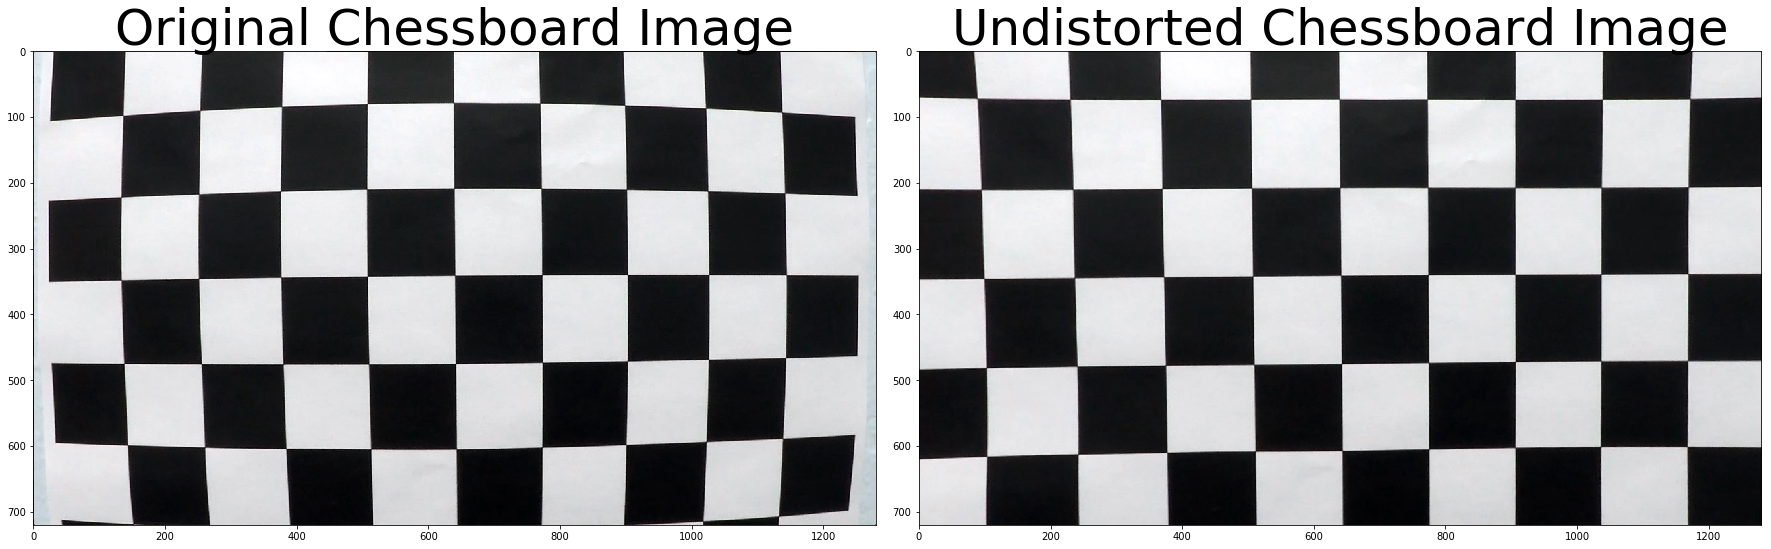

In [31]:
# Load modules.
%matplotlib inline

# Function that performs a camera calibration, image distortion correction and returns an undistorted image.
def cal_undistort(img, objpoints, imgpoints):
    # Calculate camera calibration:
    # camera matrix 'mtx'
    # distortion coefficients 'dist'
    # Position of camera in real world: rotation ('rvecs') and translation ('tvecs') vectors.
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
    # Undistort image.
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

# Undistort, plot and save a chessboard image.
# Read in a chessboard image.
img = cv2.imread('./camera_cal/calibration1.jpg')
# Undistort chessboard image.
undistorted = cal_undistort(img, objpoints, imgpoints)
# Plot undistorted chessboard image.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Chessboard Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Chessboard Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# Save undistorted road image.
path = './output_images/undistorted_chessboard.jpg'
cv2.imwrite(path, undistorted)

# Undistort and save road images
# Make a list of calibration images.
images = glob.glob('./test_images/*.jpg')

# Step through the list, undistort image and save it.
for fname in images:
    #print(fname)
    # Read in a road image.
    img = cv2.imread(fname)
    # Undistort road image.
    undistorted = cal_undistort(img, objpoints, imgpoints)
    # Save undistorted road image.
    path = str(fname)
    filename = path.split('/')[-1]
    img_name = filename.split('.')[-2]
    new_path = './output_images/undistorted_' + img_name + '.jpg'
    #print(new_path)
    cv2.imwrite(new_path, undistorted)